<a href="https://colab.research.google.com/github/agarwalpratik/aiml/blob/main/1_Visualization_Based_Metrics_For_Classification_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('Social_Network_Ads (1).csv')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.Purchased.value_counts()

,count
Purchased,
0,257
1,143


In [8]:
features = data.iloc[:,[2,3]].values
label = data.iloc[:,4].values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=158)

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
#Evaluation
# 1. Test for generalization

print("Testing Score is {} and Training Score is {} ".format(model.score(X_test,y_test) , model.score(X_train,y_train)))

Testing Score is 0.8875 and Training Score is 0.834375 


In [ ]:
# 2. Use Viz to check whether to accept or reject the model


In [11]:
#ROC Curve

model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [12]:
model.predict_proba(X_test)

array([[0.52936036, 0.47063964],
       [0.73047495, 0.26952505],
       [0.99294752, 0.00705248],
       [0.01820969, 0.98179031],
       [0.98308975, 0.01691025],
       [0.70932978, 0.29067022],
       [0.40586053, 0.59413947],
       [0.61896884, 0.38103116],
       [0.42952401, 0.57047599],
       [0.86988771, 0.13011229],
       [0.97703225, 0.02296775],
       [0.98930618, 0.01069382],
       [0.97755704, 0.02244296],
       [0.95783229, 0.04216771],
       [0.19585335, 0.80414665],
       [0.90769439, 0.09230561],
       [0.99864278, 0.00135722],
       [0.59328579, 0.40671421],
       [0.85688462, 0.14311538],
       [0.99581618, 0.00418382],
       [0.72683404, 0.27316596],
       [0.978012  , 0.021988  ],
       [0.96589616, 0.03410384],
       [0.74269919, 0.25730081],
       [0.08985978, 0.91014022],
       [0.52611959, 0.47388041],
       [0.99036256, 0.00963744],
       [0.59454869, 0.40545131],
       [0.98785699, 0.01214301],
       [0.99684561, 0.00315439],
       [0.

## **ROC is only applicable for Balanced Dataset. This code is just a demo explaining how to plot ROC curve**

In [13]:
#Plot ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Step1:  Extract the prob value of 1
probabilityValues = model.predict_proba(X_test)[:,1]

In [15]:
#Step2: Calc AUC
auc = roc_auc_score(y_test,probabilityValues)

0.9548678272082527


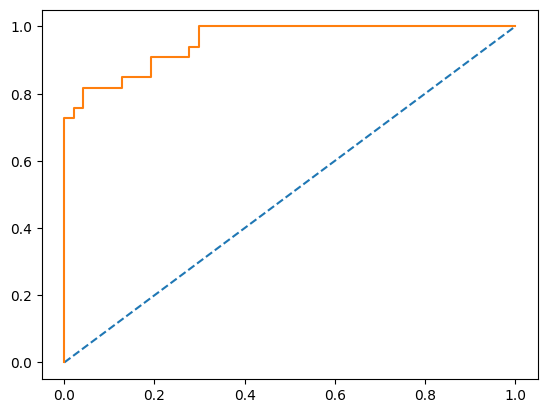

In [16]:
#Step3: Plot Skill Line (0,0)(1,1)
plt.plot([0,1],[0,1],linestyle="--")

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test,probabilityValues)
plt.plot(fpr,tpr)
print(auc)

In [ ]:
# If the ROC curve is above the skillline, approve model else discard model.

PR Curve

0.8522560178749757


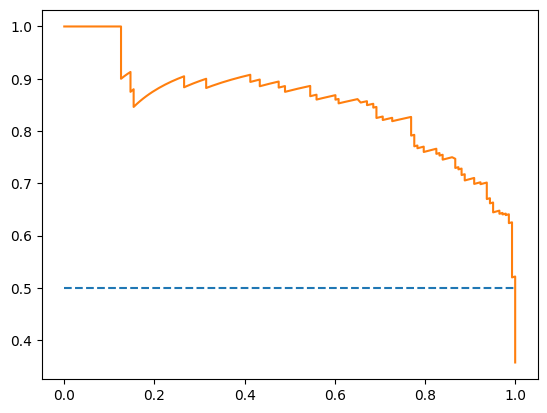

In [17]:
#Plot PR
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1:  Extract the prob value of 1
probabilityValues = model.predict_proba(features)[:,1]

#Step2: Calc AUC & PR values
precision,recall,_ = precision_recall_curve(label,probabilityValues)
aucPR = auc(recall,precision)

#Step3: Plot Skill Line (0,0.5)(1,0.5)
plt.plot([0,1],[0.5,0.5],linestyle="--")

#Step4: Plot PR
plt.plot(recall,precision)
print(aucPR)

In [ ]:
'''
Day1 - Data Preprocessing using Sklearn
Day2 - Regression
Day3 - Feature Engineering (Corr, RFE, SBM)
Day4 - Classification , LogisticRegression
Day5 - KNN Algo (Regression and Classification)
Day6 - Ensemble Learning (Bagging)
Day7 - DecisionTree, RandomForest, XGBoost, Boosting
Day8 - Boosting Theory, Cross Validation, Decision Region
Day9 - Dimensionality Reduction (PCA), Unsupervised learning, KMeans Clustering
Day10 - ROC PR Curve, SMOTE

'''